- 생각해볼만한 사항
- 

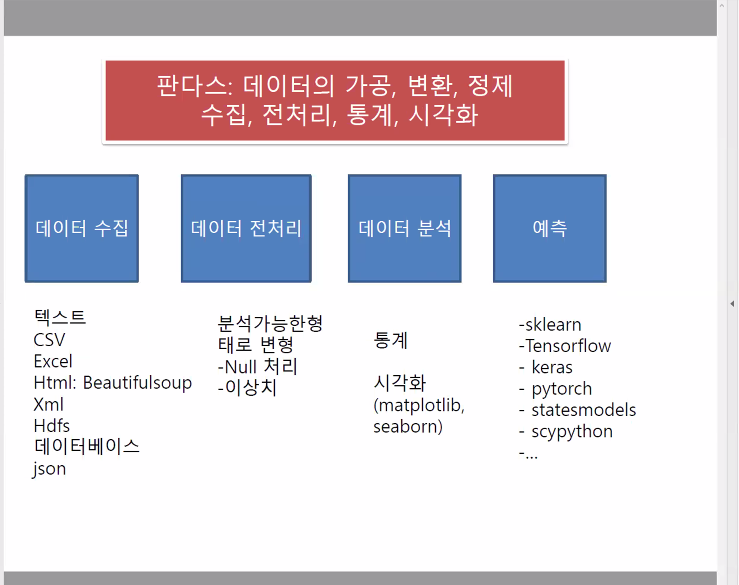

In [1]:
import PIL.Image as pilimg

a = pilimg.open('./판다스.png')
a

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import numpy as np # 행렬연산 및 기본연산 
import pandas as pd # 데이터 분석 및 전처리
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_iris, load_wine
import sklearn.metrics as metrics
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

import warnings
import matplotlib
warnings.simplefilter('ignore')
plt.rcParams["figure.figsize"] = (36,12)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False


---

In [3]:
data = pd.read_csv('creditcard.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,284797,284798,284799,284800,284801,284802,284803,284804,284805,284806
Time,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,7.000000,7.000000,9.000000,...,172782.000000,172782.000000,172783.000000,172784.000000,172785.000000,172786.000000,172787.000000,172788.000000,172788.000000,172792.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233,-0.425966,1.229658,-0.644269,-0.894286,-0.338262,...,-0.241923,0.219529,-1.775135,2.039560,0.120316,-11.881118,-0.732789,1.919565,-0.240440,-0.533413
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737,0.960523,0.141004,1.417964,0.286157,1.119593,...,0.712247,0.881246,-0.004235,-0.175233,0.931005,10.071785,-0.055080,-0.301254,0.530483,-0.189733
V3,2.536347,0.166480,1.773209,1.792993,1.548718,1.141109,0.045371,1.074380,-0.113192,1.044367,...,0.399806,-0.635891,1.189786,-1.196825,-0.546012,-9.834783,2.035030,-3.249640,0.702510,0.703337
V4,1.378155,0.448154,0.379780,-0.863291,0.403034,-0.168252,1.202613,-0.492199,-0.271526,-0.222187,...,-0.463406,0.960928,0.331096,0.234580,-0.745097,-2.066656,-0.738589,-0.557828,0.689799,-0.506271
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193,0.420987,0.191881,0.948934,2.669599,0.499361,...,0.244531,-0.152971,1.196063,-0.008713,1.130314,-5.364473,0.868229,2.630515,-0.377961,-0.012546
V6,0.462388,-0.082361,1.800499,1.247203,0.095921,-0.029728,0.272708,0.428118,3.721818,-0.246761,...,-1.343668,-1.014307,5.519980,-0.726571,-0.235973,-2.606837,1.058415,3.031260,0.623708,-0.649617
V7,0.239599,-0.078803,0.791461,0.237609,0.592941,0.476201,-0.005159,1.120631,0.370145,0.651583,...,0.929369,0.427126,-1.518185,0.017050,0.812722,-4.918215,0.024330,-0.296827,-0.686180,1.577006
V8,0.098698,0.085102,0.247676,0.377436,-0.270533,0.260314,0.081213,-3.807864,0.851084,0.069539,...,-0.206210,0.121340,2.080825,-0.118228,0.115093,7.305334,0.294869,0.708417,0.679145,-0.414650
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739,-0.568671,0.464960,0.615375,-0.392048,-0.736727,...,0.106234,-0.285670,1.159498,0.435402,-0.204064,1.914428,0.584800,0.432454,0.392087,0.486180


In [4]:
data.shape

(284807, 31)

In [5]:
data.info() # Class 제외 모두 float64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
data.isna().sum() # 결측치 0

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

---

# 정상거래(Class 0)의 비율이 월등히 높다.

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

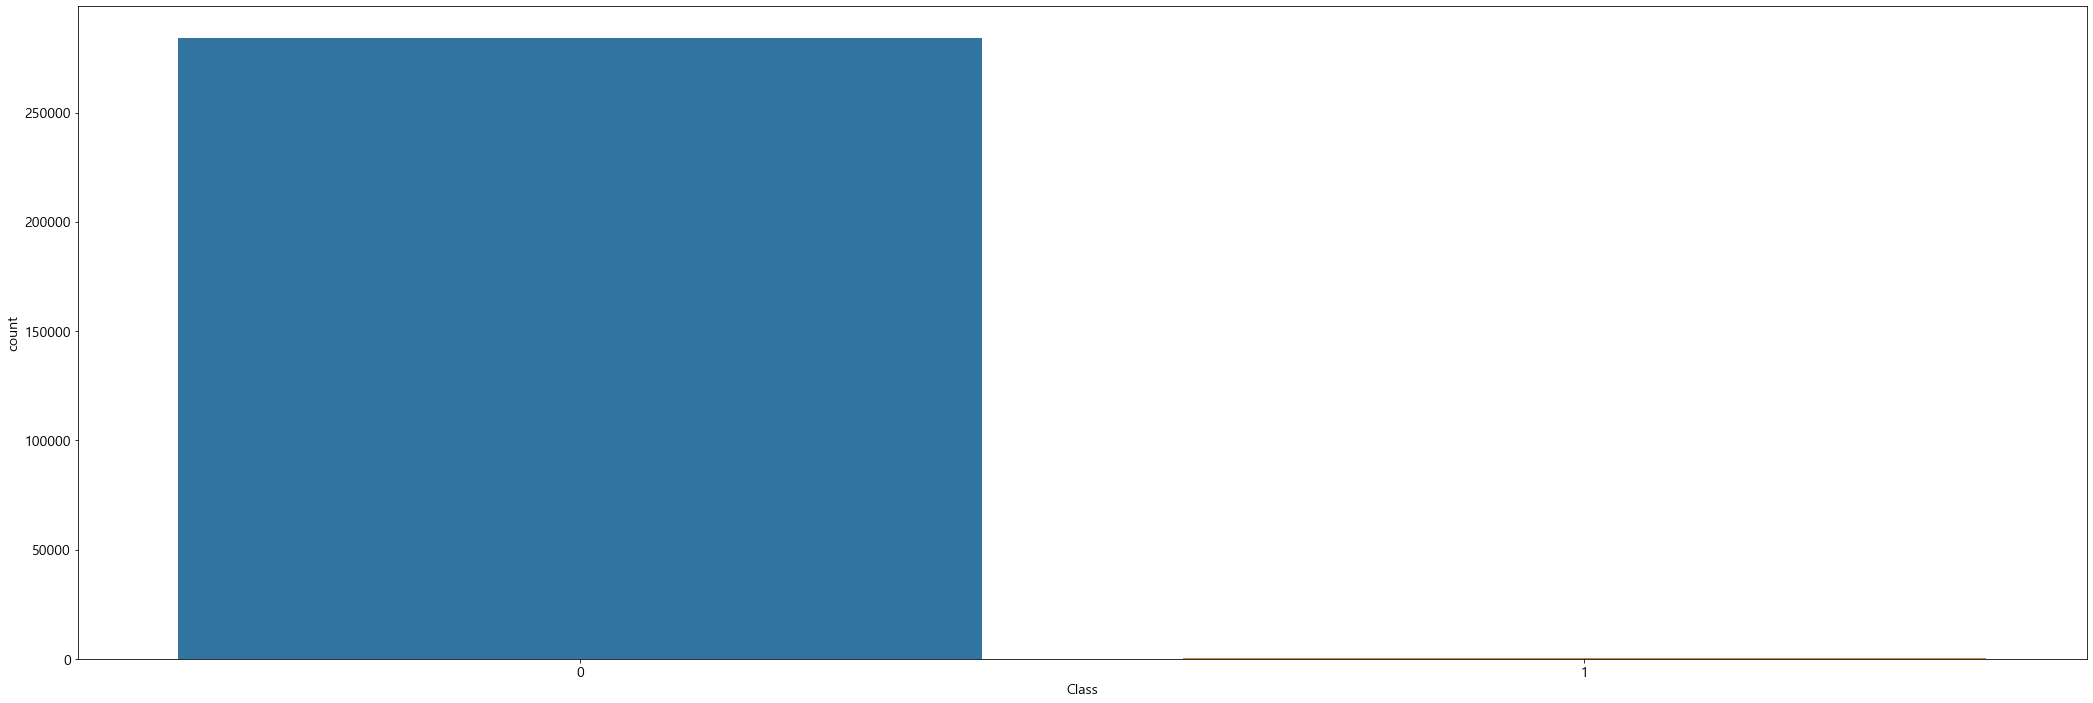

In [9]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=data, x = 'Class')
plt.show()
# 0<<<<<<<<<1

In [10]:
# Class 비율 확인
data['Class'].value_counts() / data['Class'].count() * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

---
## Class train_test_split

In [11]:
# feature, label data
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=6,stratify=y)

print(y_train.value_counts() / y_train.count() * 100)
print(y_test.value_counts() / y_test.count() * 100)

0    99.827075
1     0.172925
Name: Class, dtype: float64
0    99.827955
1     0.172045
Name: Class, dtype: float64


## 

## LogisticRegression

In [13]:
# ct = make_column_transformer((StandardScaler(),[0, 29]))
# model = make_pipeline(ct, LogisticRegression(random_state=6))
# model.fit(x_train, y_train)

In [14]:
model=LogisticRegression(random_state=6)
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9990168755074722
0.9988062216916541


In [15]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

In [16]:
print("CM",classification_report(y_test, y_pred))

CM               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.67      0.66        98

    accuracy                           1.00     56962
   macro avg       0.82      0.84      0.83     56962
weighted avg       1.00      1.00      1.00     56962



---
### LogisticRegression Confusion Matrix

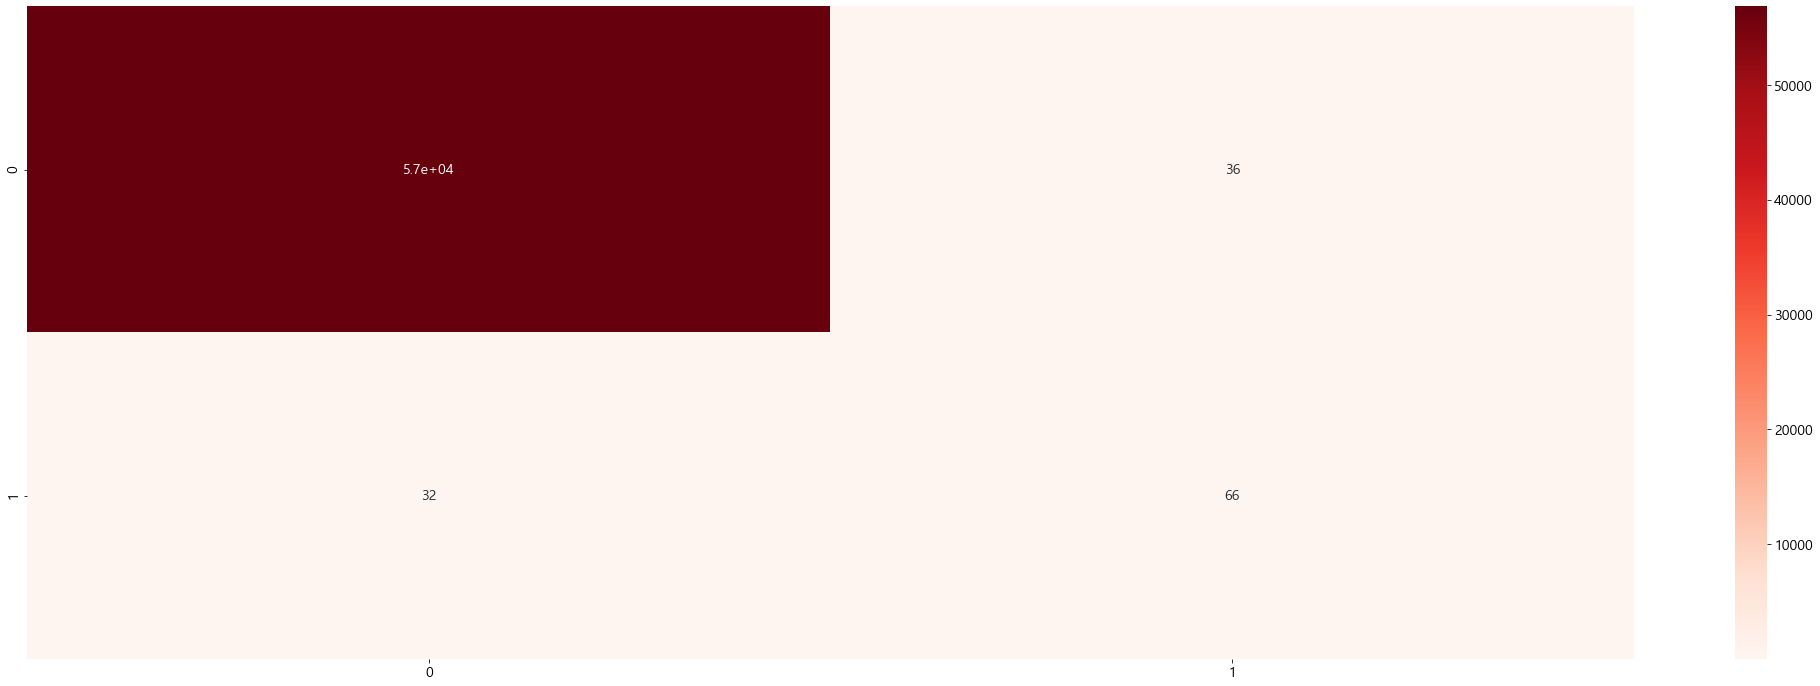

정밀도:  0.6470588235294118
재현율:  0.673469387755102
f1 score:  0.66


In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()


print('정밀도: ', precision_score(y_test, y_pred))
print('재현율: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))

### MinMaxScaler, LogisticRegression CM

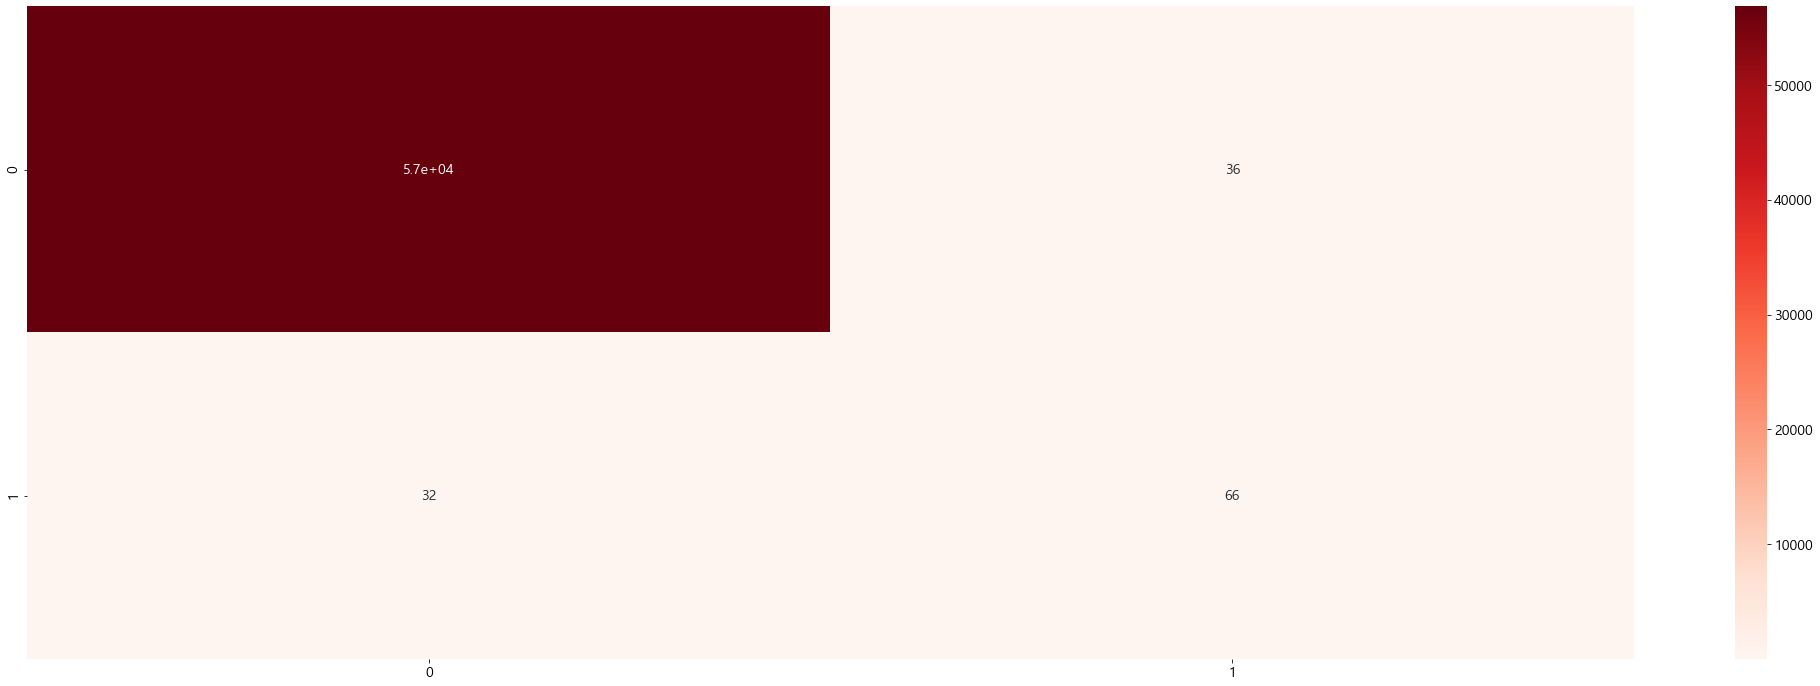

정밀도:  0.6470588235294118
재현율:  0.673469387755102
f1 score:  0.66


In [18]:
model = make_pipeline(MinMaxScaler(), LogisticRegression())
model.fit(x_train, y_train)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()


print('정밀도: ', precision_score(y_test, y_pred))
print('재현율: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))

---
## Undersampling(NearMiss) 후 f1_score 비교

In [19]:
from imblearn.under_sampling import NearMiss

NM_model = NearMiss(version=2)

In [20]:
x_train_u, y_train_u = NearMiss().fit_resample(x_train.values, y_train.values)
x_test_u, y_test_u   = NearMiss().fit_resample(x_test.values, y_test.values)

In [21]:
y_pred_u = model.predict(x_test_u)
cm = confusion_matrix(y_test_u, y_pred_u)
cm

array([[98,  0],
       [51, 47]], dtype=int64)

In [22]:
print("이전",classification_report(y_test, y_pred))
print("이후",classification_report(y_test_u, y_pred_u))

이전               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.67      0.66        98

    accuracy                           1.00     56962
   macro avg       0.82      0.84      0.83     56962
weighted avg       1.00      1.00      1.00     56962

이후               precision    recall  f1-score   support

           0       0.66      1.00      0.79        98
           1       1.00      0.48      0.65        98

    accuracy                           0.74       196
   macro avg       0.83      0.74      0.72       196
weighted avg       0.83      0.74      0.72       196



---
### LogisticRegression Confusion Matrix

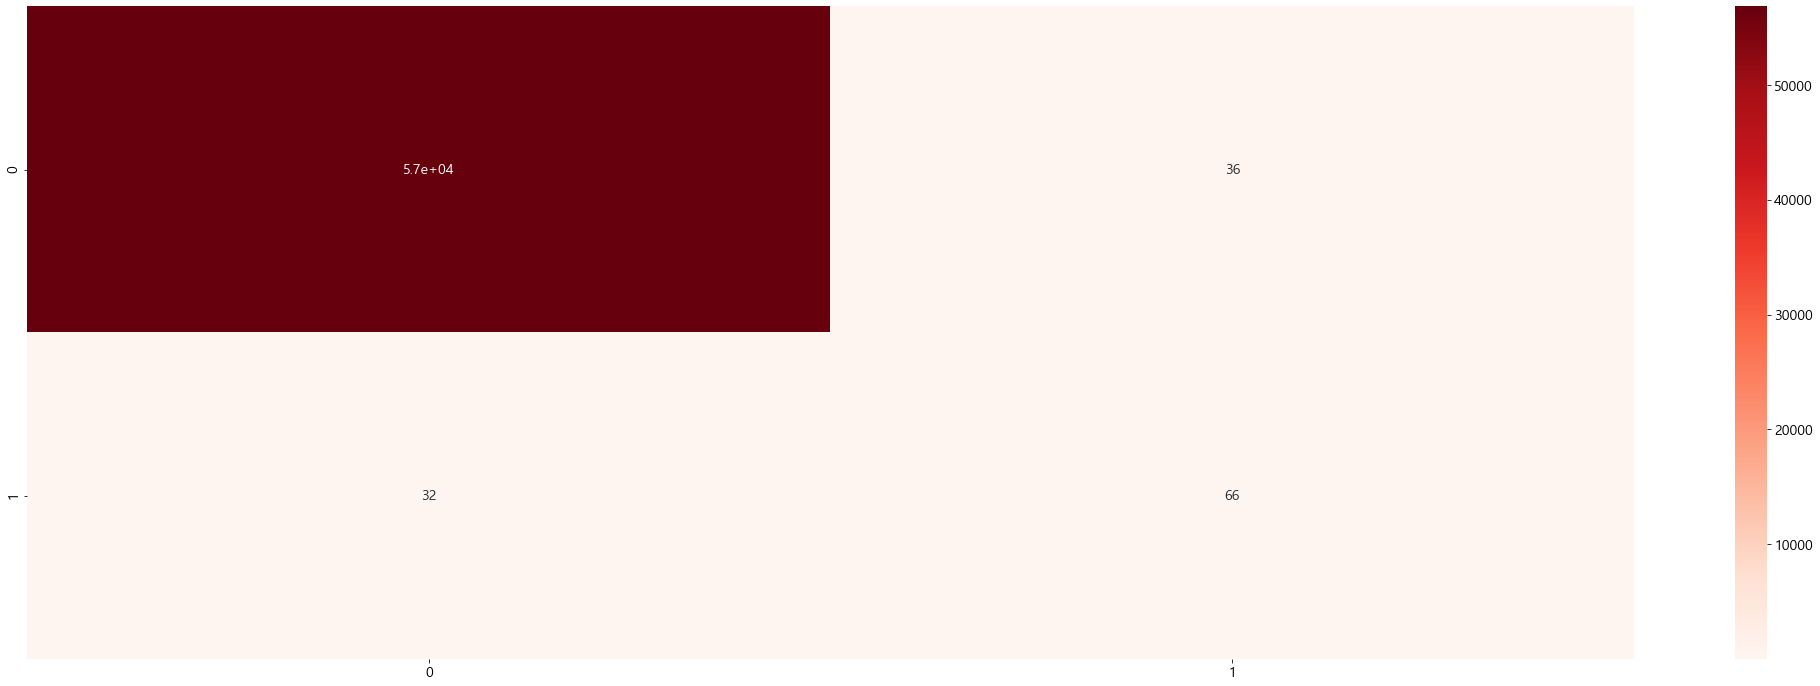

정밀도:  0.956989247311828
재현율:  0.9081632653061225
f1 score:  0.9319371727748691


In [23]:
model = LogisticRegression()
model.fit(x_train_u, y_train_u)

y_pred_u = model.predict(x_test_u)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()


print('정밀도: ', precision_score(y_test_u, y_pred_u))
print('재현율: ', recall_score(y_test_u, y_pred_u))
print('f1 score: ', f1_score(y_test_u, y_pred_u))

### MinMaxScaler, LogisticRegression CM

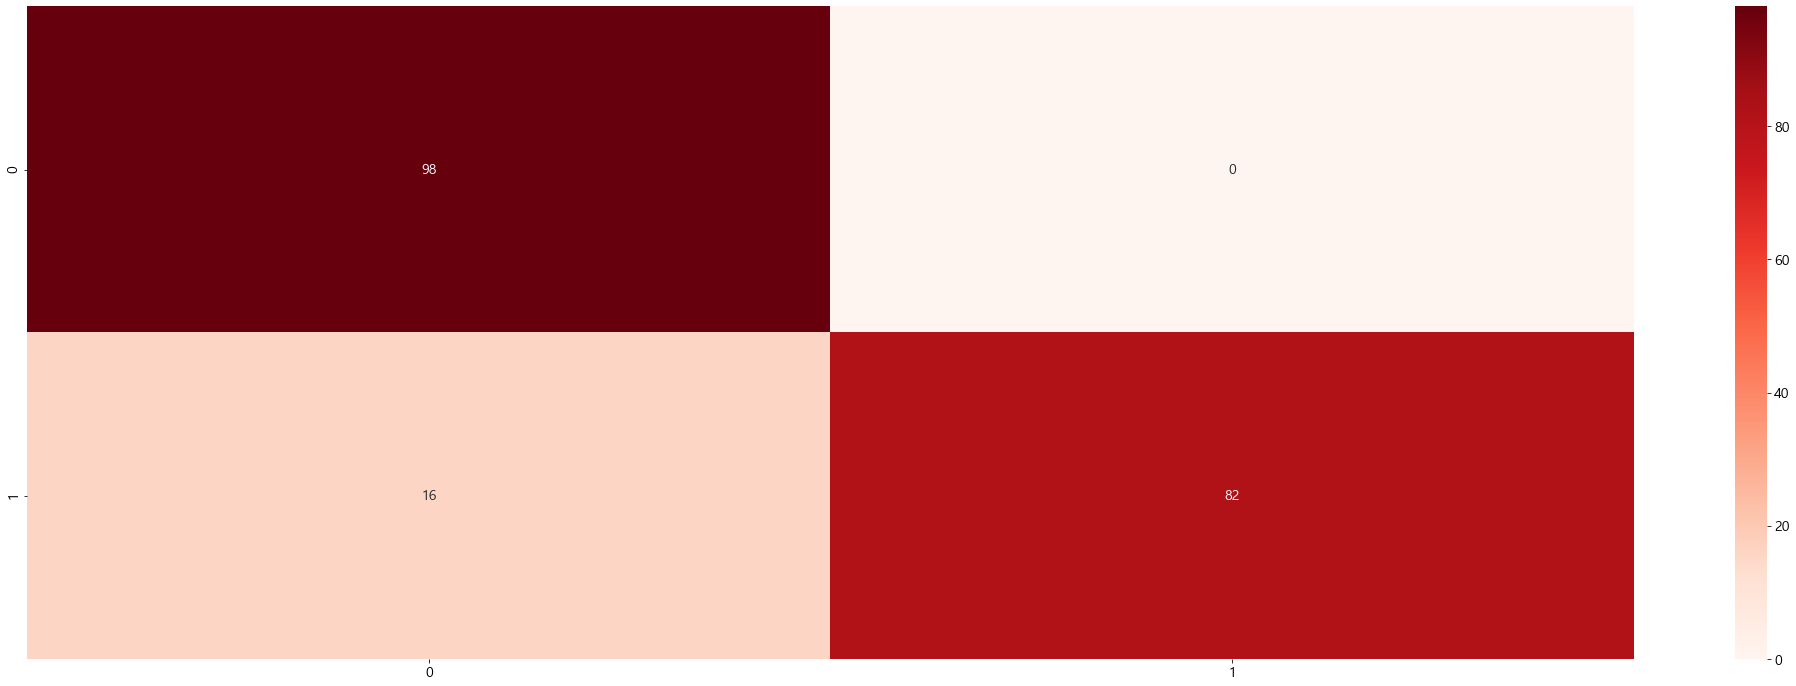

정밀도:  1.0
재현율:  0.8367346938775511
f1 score:  0.9111111111111111


In [24]:
model = make_pipeline(MinMaxScaler(), LogisticRegression())
model.fit(x_train_u, y_train_u)

y_pred_u = model.predict(x_test_u)

cm = confusion_matrix(y_test_u, y_pred_u)

sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()


print('정밀도: ', precision_score(y_test_u, y_pred_u))
print('재현율: ', recall_score(y_test_u, y_pred_u))
print('f1 score: ', f1_score(y_test_u, y_pred_u))

### StandardScaler, LogisticRegression CM

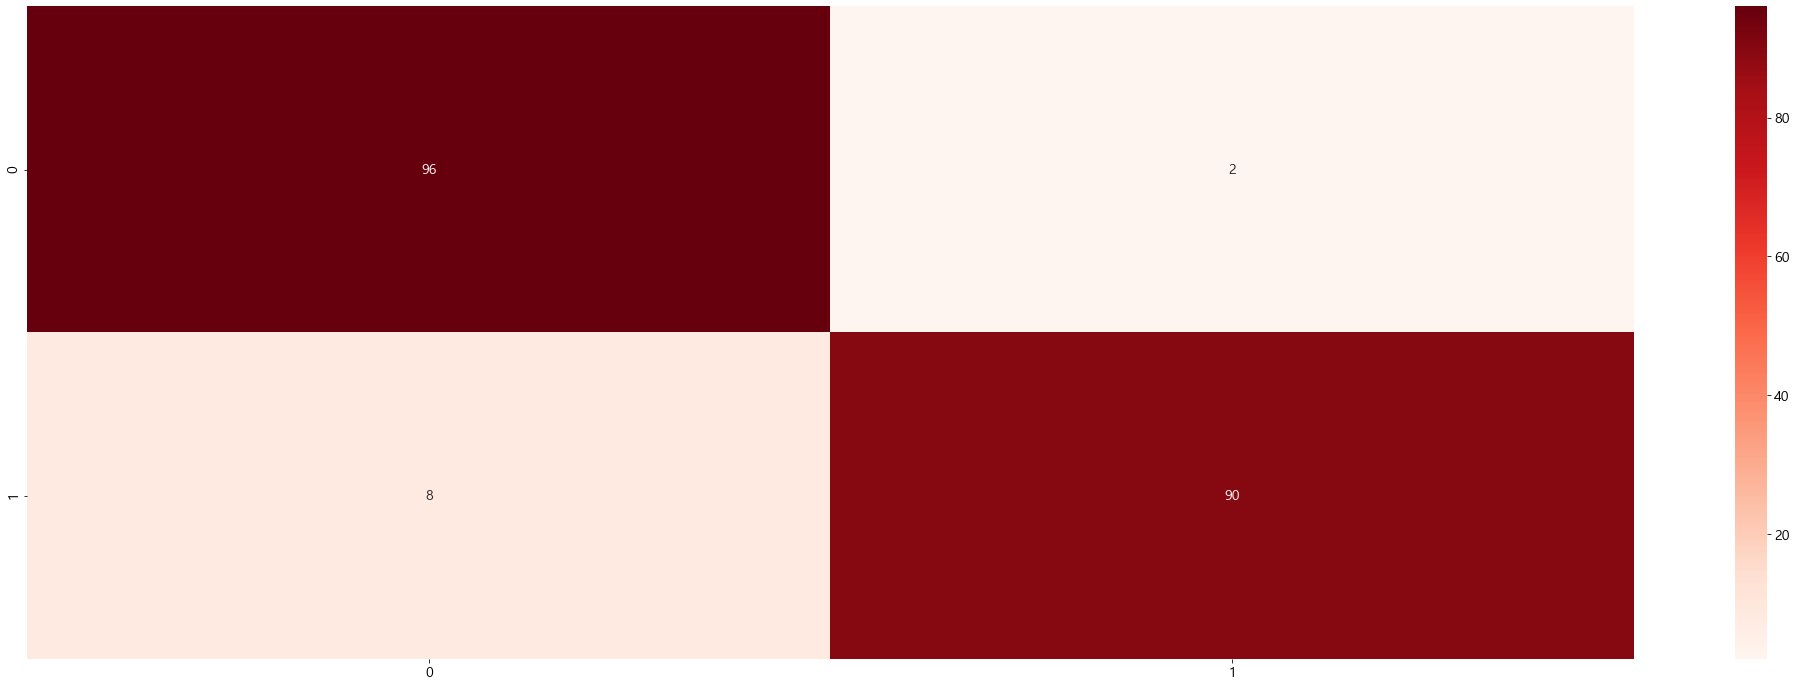

정밀도:  0.9782608695652174
재현율:  0.9183673469387755
f1 score:  0.9473684210526316


In [25]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train_u, y_train_u)

y_pred_u = model.predict(x_test_u)

cm = confusion_matrix(y_test_u, y_pred_u)

sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()


print('정밀도: ', precision_score(y_test_u, y_pred_u))
print('재현율: ', recall_score(y_test_u, y_pred_u))
print('f1 score: ', f1_score(y_test_u, y_pred_u))

---
## ROC Curve 비교

In [26]:
x_train_df=pd.DataFrame(x_train_u)
# y_trian_df=pd.DataFrame(y_train_u)

In [27]:
display(x_train_df.head(3))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78
1,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99
2,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79


In [28]:
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train_u, y_train_u)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [29]:
p = model_lr.predict_proba(x_test)

q = model_lr.predict_proba(x_test_u)

In [30]:
df = pd.DataFrame([y_test])
df = df.T 
df

df_u = pd.DataFrame([y_test_u])
df_u = df_u.T
df_u

,0
0,0
1,0
2,0
3,0
4,0
...,...
191,1
192,1
193,1
194,1


In [31]:
df['proba'] = p[:,1]
df

df_u['proba'] = q[:,1]
df_u

,0,proba
0,0,0.028278
1,0,0.045278
2,0,0.014225
3,0,0.011154
4,0,0.023374
...,...,...
191,1,0.995301
192,1,0.999999
193,1,1.000000
194,1,0.989882


In [32]:
df.sort_values(by='proba')

df_u.sort_values(by='proba')

,0,proba
38,0,0.000642
93,0,0.000691
34,0,0.003510
6,0,0.004311
17,0,0.004355
...,...,...
187,1,1.000000
173,1,1.000000
174,1,1.000000
107,1,1.000000


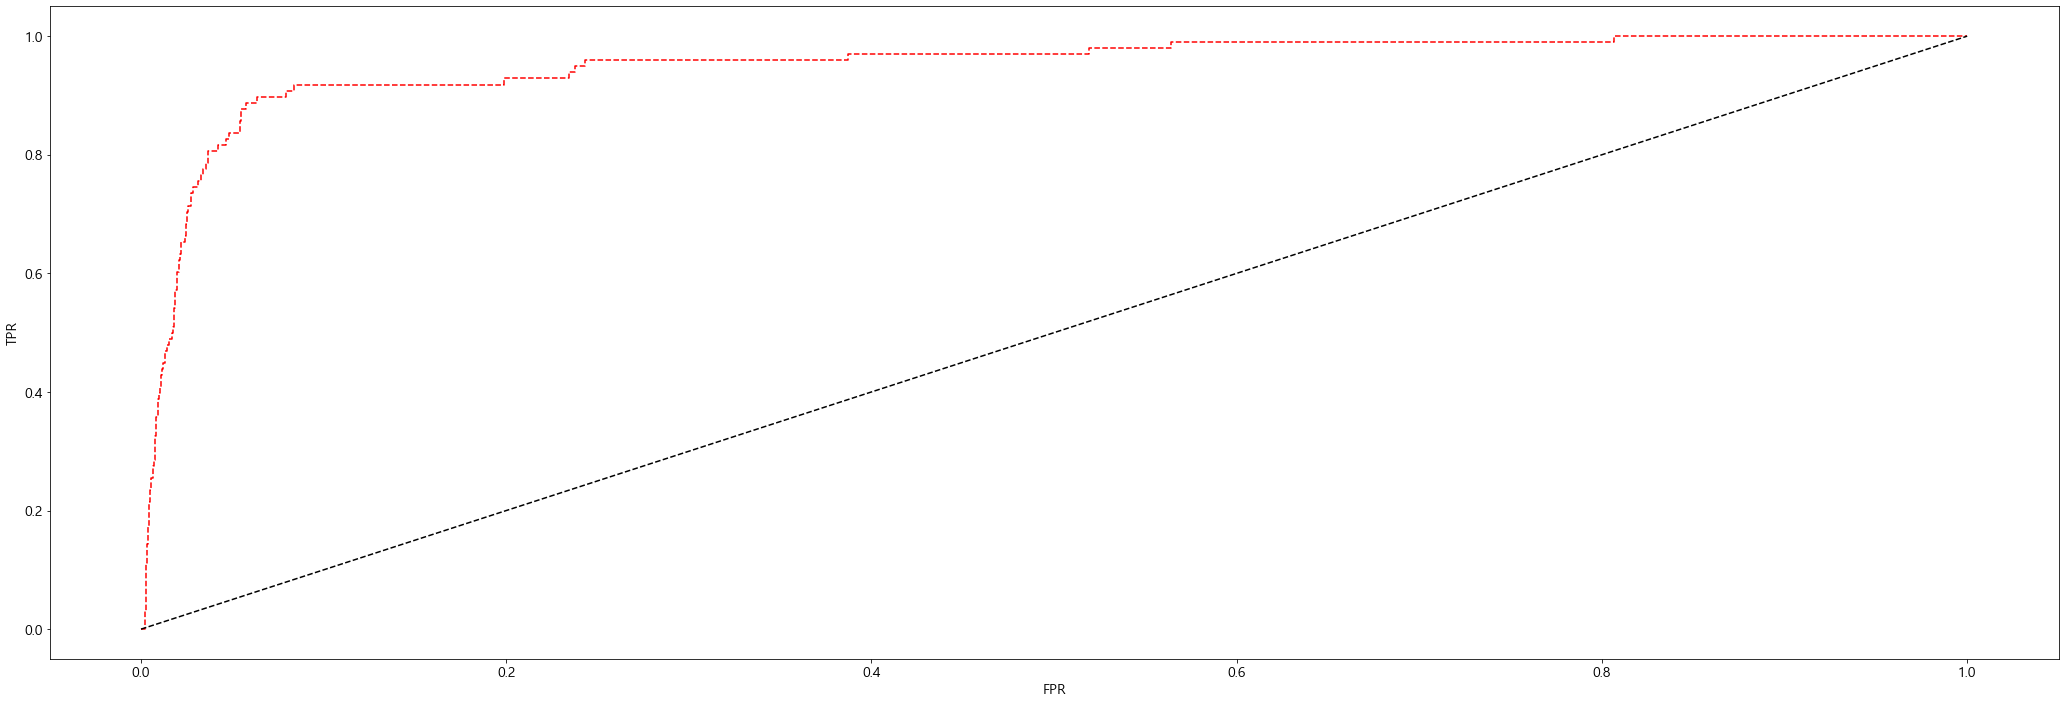

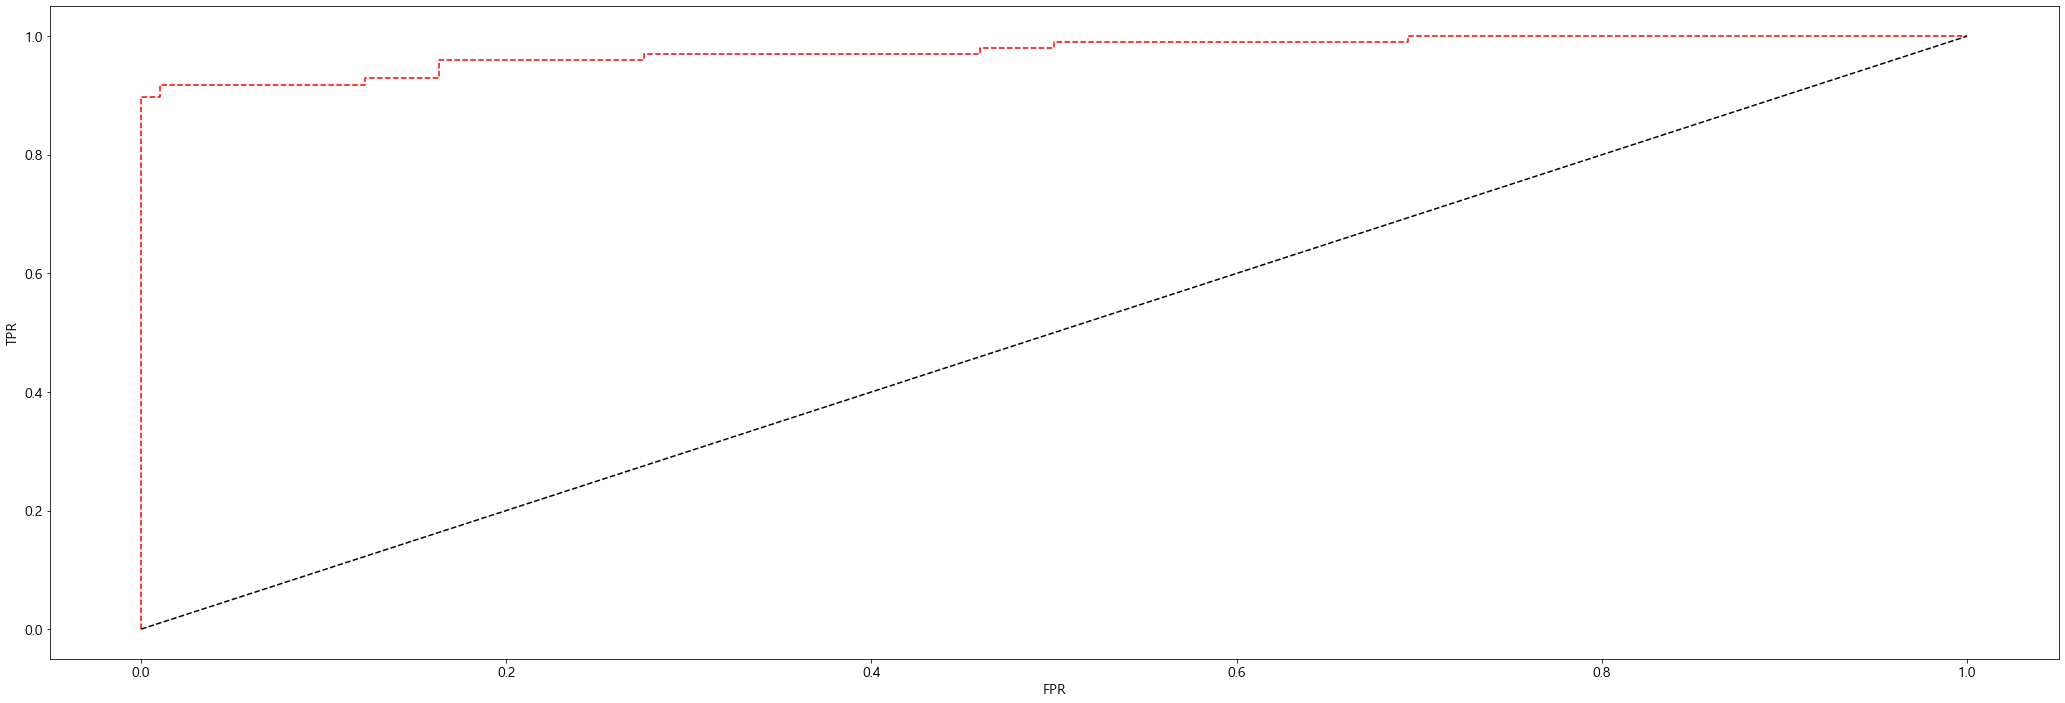

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, df['proba'].values)
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test_u, df_u['proba'].values)
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

---

# Corr() 전체 상관관계 확인

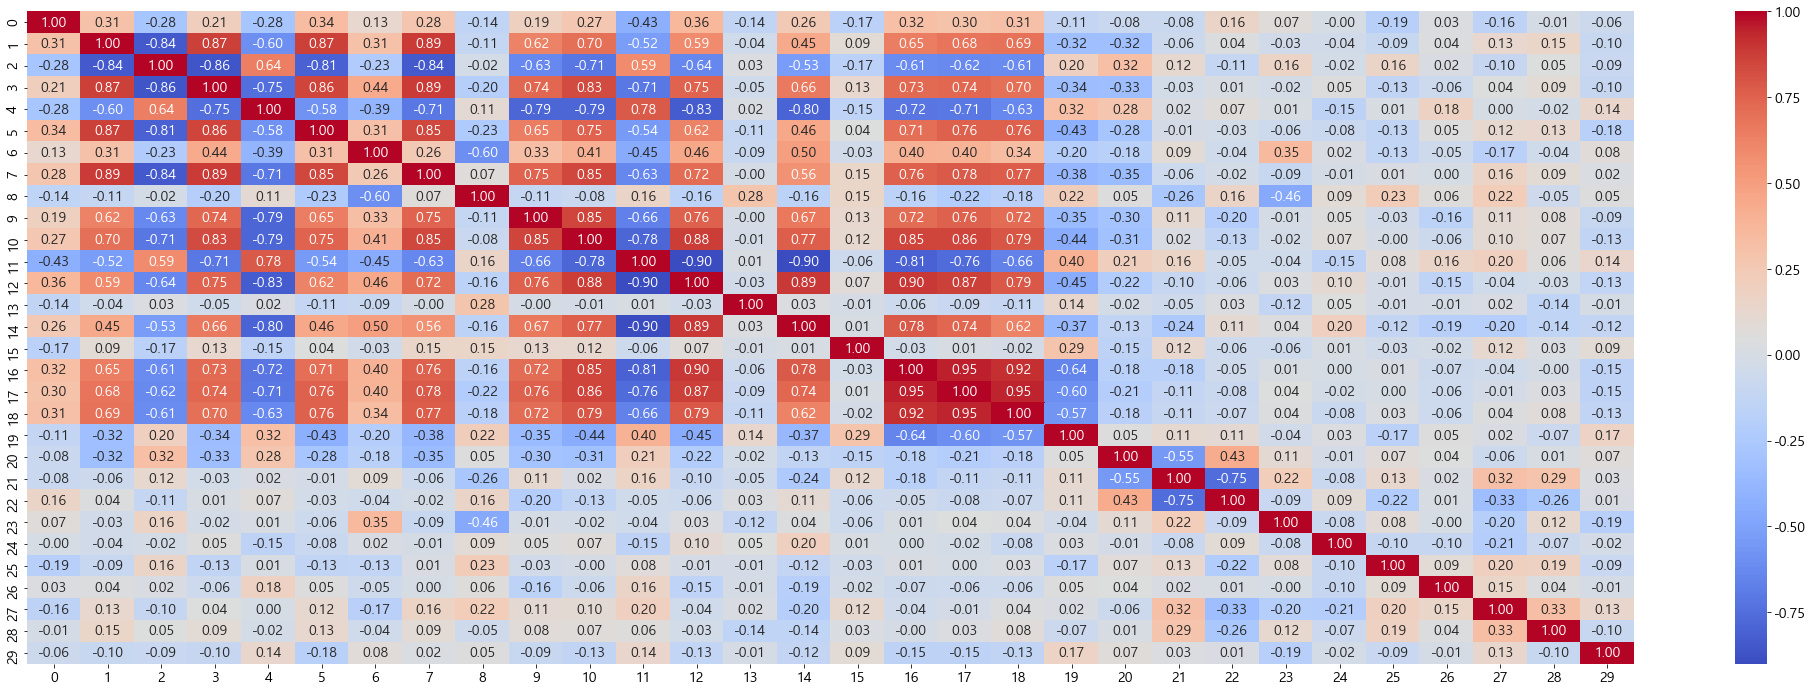

In [34]:
corr = sns.heatmap(x_train_df[:].corr()
                , annot=True, fmt= ".2f", cmap="coolwarm")
# time  : 
# amount

---

# Time, Amount 밀도확인

(472.0, 170348.0)

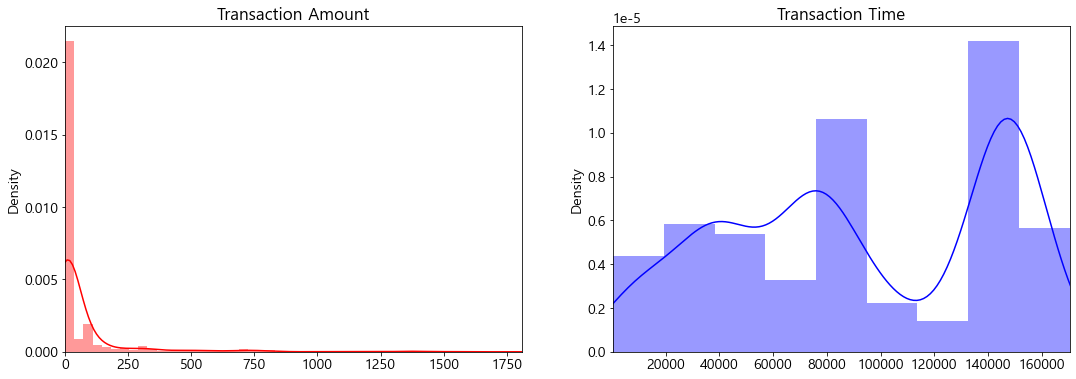

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

amount_val = x_train_df[29].values
time_val = x_train_df[0].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

---

(0.0, 1809.68)

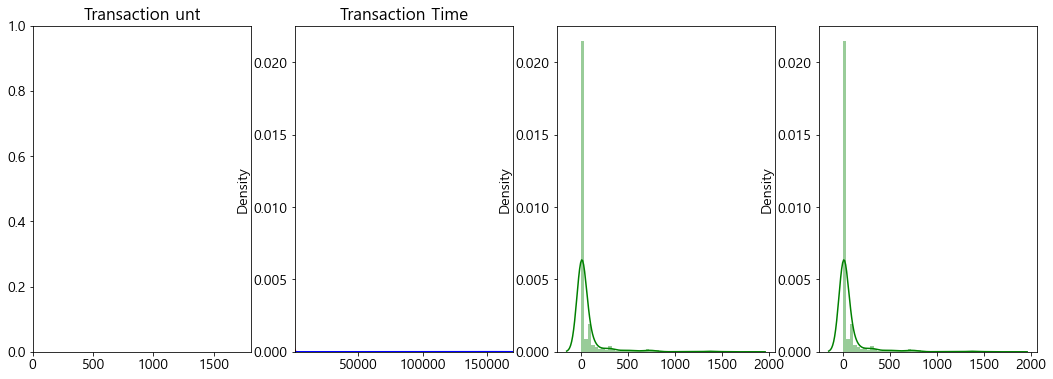

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(18,6))

# amount_val = x_train_df[29].values
# time_val = x_train_df[0].values
v1 = x_train_df[1].values
v1 = x_train_df[3].values
v1 = x_train_df[5].values
v1 = x_train_df[7].values

sns.distplot(amount_val, ax=ax[1], color='r')
ax[0].set_title('Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val, ax=ax[2], color='g')
ax[0].set_title('Transaction Amot')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(amount_val, ax=ax[3], color='g')
ax[0].set_title('Transaction unt')
ax[0].set_xlim([min(amount_val), max(amount_val)])